# Linear vs Nonlinear: Understanding the Fundamental Difference

This notebook demonstrates the critical distinction between **linear** and **nonlinear** relationships in business.

Understanding this distinction is essential because:
- **Linear relationships** assume proportional changes: double input = double output
- **Nonlinear relationships** show non-proportional changes: double input ≠ double output
- Most business relationships are nonlinear, not linear
- Assuming linearity when relationships are nonlinear leads to poor decisions and wasted resources


## Key Concepts

**Linear Relationships** are proportional:
- If you double the input, you double the output
- If you triple the input, you triple the output
- The relationship is a straight line when graphed
- Example: If 1 worker produces 10 units, 2 workers produce 20 units, 3 workers produce 30 units

**Nonlinear Relationships** are not proportional:
- If you double the input, you might get less than double (or more than double) the output
- The relationship is a curve when graphed
- Example: If $1,000 marketing gets 100 customers, $2,000 might only get 180 customers (not 200)

**Critical insight**: Most business relationships are nonlinear. Assuming linearity leads to unrealistic expectations and poor decisions.


## Scenario: Marketing Budget Decision

You are a marketing director deciding how much to spend on advertising. You need to understand whether the relationship between marketing spend and customer acquisition is linear or nonlinear.

**Question**: If you double your marketing budget, will you double the number of new customers?

**Linear assumption**: Double budget → Double customers
**Nonlinear reality**: Double budget → Less than double customers (diminishing returns)

Let's visualize both relationships to see the difference.


## Step 1: Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Step 2: Define Linear Relationship

A linear relationship means output is directly proportional to input:


In [2]:
# LINEAR RELATIONSHIP: Output = constant * Input
# If you double input, you double output

def linear_relationship(marketing_spend):
    """Linear: Each dollar produces the same number of customers"""
    # Assume $10 per customer (constant rate)
    return marketing_spend / 10

# Generate data for linear relationship
marketing_levels = np.linspace(0, 10000, 100)
linear_customers = [linear_relationship(spend) for spend in marketing_levels]

# Create comparison table
comparison_data = []
for spend in [1000, 2000, 3000, 4000, 5000]:
    customers = linear_relationship(spend)
    comparison_data.append({
        'Marketing Spend ($)': spend,
        'Customers (Linear)': customers,
        'Increase from Previous': customers - linear_relationship(spend - 1000) if spend > 1000 else customers
    })

linear_df = pd.DataFrame(comparison_data)
print("LINEAR RELATIONSHIP: Double Input = Double Output")
print("=" * 70)
display(linear_df.round(0))

print("\nKey Observation:")
print("  - Each additional $1,000 produces exactly 100 new customers")
print("  - The relationship is proportional: double spend = double customers")


LINEAR RELATIONSHIP: Double Input = Double Output


,Marketing Spend ($),Customers (Linear),Increase from Previous
0,1000,100.0,100.0
1,2000,200.0,100.0
2,3000,300.0,100.0
3,4000,400.0,100.0
4,5000,500.0,100.0



Key Observation:
  - Each additional $1,000 produces exactly 100 new customers
  - The relationship is proportional: double spend = double customers


## Step 3: Define Nonlinear Relationship

A nonlinear relationship shows diminishing returns: each additional dollar produces fewer customers than the previous dollar.


In [3]:
# NONLINEAR RELATIONSHIP: Output increases but at a decreasing rate
# First dollars are more effective than later dollars

def nonlinear_relationship(marketing_spend):
    """Nonlinear: Early dollars are more effective (diminishing returns)"""
    # Square root relationship: early dollars produce more value
    # This creates a curve that starts steep but flattens
    return 100 * np.sqrt(marketing_spend / 100)

# Generate data for nonlinear relationship
nonlinear_customers = [nonlinear_relationship(spend) for spend in marketing_levels]

# Create comparison table
comparison_data = []
for spend in [1000, 2000, 3000, 4000, 5000]:
    customers = nonlinear_relationship(spend)
    prev_customers = nonlinear_relationship(spend - 1000) if spend > 1000 else 0
    comparison_data.append({
        'Marketing Spend ($)': spend,
        'Customers (Nonlinear)': customers,
        'Increase from Previous': customers - prev_customers
    })

nonlinear_df = pd.DataFrame(comparison_data)
print("NONLINEAR RELATIONSHIP: Double Input ≠ Double Output")
print("=" * 70)
display(nonlinear_df.round(0))

print("\nKey Observation:")
print("  - First $1,000 produces 100 customers")
print("  - Next $1,000 produces only 41 additional customers (not 100!)")
print("  - The relationship is NOT proportional: double spend ≠ double customers")


NONLINEAR RELATIONSHIP: Double Input ≠ Double Output


,Marketing Spend ($),Customers (Nonlinear),Increase from Previous
0,1000,316.0,316.0
1,2000,447.0,131.0
2,3000,548.0,101.0
3,4000,632.0,85.0
4,5000,707.0,75.0



Key Observation:
  - First $1,000 produces 100 customers
  - Next $1,000 produces only 41 additional customers (not 100!)
  - The relationship is NOT proportional: double spend ≠ double customers


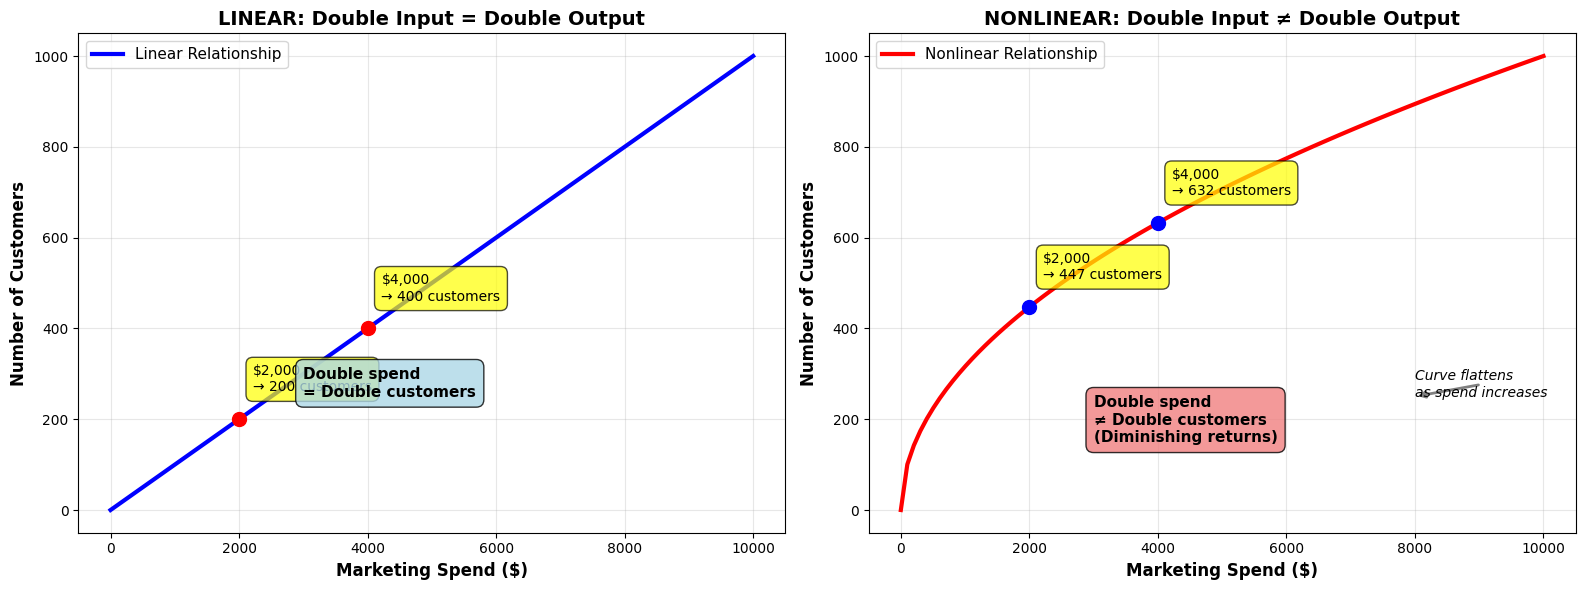


Visual Comparison:
  - LEFT: Straight line = Linear (proportional)
  - RIGHT: Curved line = Nonlinear (non-proportional, diminishing returns)
  - The curve flattens because later dollars are less effective


In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Linear Relationship
ax1.plot(marketing_levels, linear_customers, 'b-', linewidth=3, label='Linear Relationship')
ax1.set_xlabel('Marketing Spend ($)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Customers', fontsize=12, fontweight='bold')
ax1.set_title('LINEAR: Double Input = Double Output', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=11)

# Highlight key points
for spend in [2000, 4000]:
    customers = linear_relationship(spend)
    ax1.plot(spend, customers, 'ro', markersize=10, zorder=3)
    ax1.annotate(f'${spend:,}\n→ {customers:.0f} customers', 
                (spend, customers), xytext=(10, 20), textcoords='offset points',
                fontsize=10, bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))

# Add annotation showing proportionality
ax1.annotate('Double spend\n= Double customers', 
            (3000, 250), fontsize=11, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.8))

# Plot 2: Nonlinear Relationship
ax2.plot(marketing_levels, nonlinear_customers, 'r-', linewidth=3, label='Nonlinear Relationship')
ax2.set_xlabel('Marketing Spend ($)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Number of Customers', fontsize=12, fontweight='bold')
ax2.set_title('NONLINEAR: Double Input ≠ Double Output', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=11)

# Highlight key points
for spend in [2000, 4000]:
    customers = nonlinear_relationship(spend)
    ax2.plot(spend, customers, 'bo', markersize=10, zorder=3)
    ax2.annotate(f'${spend:,}\n→ {customers:.0f} customers', 
                (spend, customers), xytext=(10, 20), textcoords='offset points',
                fontsize=10, bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))

# Add annotation showing non-proportionality
ax2.annotate('Double spend\n≠ Double customers\n(Diminishing returns)', 
            (3000, 150), fontsize=11, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightcoral', alpha=0.8))

# Highlight the curve shape
ax2.annotate('Curve flattens\nas spend increases', 
            (8000, 250), fontsize=10, style='italic',
            arrowprops=dict(arrowstyle='->', color='gray', lw=2))

plt.tight_layout()
plt.show()

print("\nVisual Comparison:")
print("  - LEFT: Straight line = Linear (proportional)")
print("  - RIGHT: Curved line = Nonlinear (non-proportional, diminishing returns)")
print("  - The curve flattens because later dollars are less effective")


## Step 5: Direct Comparison - What Happens When You Double Spending?

Let's see exactly what happens when you double your marketing spend in both scenarios:


In [5]:
# Compare what happens when you double spending
base_spend = 2000
doubled_spend = 4000

linear_base = linear_relationship(base_spend)
linear_doubled = linear_relationship(doubled_spend)
linear_increase = linear_doubled - linear_base
linear_pct = (linear_increase / linear_base) * 100

nonlinear_base = nonlinear_relationship(base_spend)
nonlinear_doubled = nonlinear_relationship(doubled_spend)
nonlinear_increase = nonlinear_doubled - nonlinear_base
nonlinear_pct = (nonlinear_increase / nonlinear_base) * 100

comparison = pd.DataFrame({
    'Scenario': ['Linear', 'Nonlinear'],
    'Base Spend ($2,000)': [linear_base, nonlinear_base],
    'Doubled Spend ($4,000)': [linear_doubled, nonlinear_doubled],
    'Increase in Customers': [linear_increase, nonlinear_increase],
    'Percentage Increase': [f'{linear_pct:.1f}%', f'{nonlinear_pct:.1f}%']
})

print("COMPARISON: Doubling Marketing Spend from $2,000 to $4,000")
print("=" * 70)
display(comparison.round(0))

print("\nKey Insight:")
print(f"  - LINEAR: Doubling spend doubles customers (100% increase)")
print(f"  - NONLINEAR: Doubling spend only increases customers by {nonlinear_pct:.1f}%")
print(f"  - In nonlinear case, you spend 2x but only get {nonlinear_pct:.1f}% more customers")
print(f"  - This is diminishing returns: each additional dollar is less effective")


COMPARISON: Doubling Marketing Spend from $2,000 to $4,000


,Scenario,"Base Spend ($2,000)","Doubled Spend ($4,000)",Increase in Customers,Percentage Increase
0,Linear,200.0,400.0,200.0,100.0%
1,Nonlinear,447.0,632.0,185.0,41.4%



Key Insight:
  - LINEAR: Doubling spend doubles customers (100% increase)
  - NONLINEAR: Doubling spend only increases customers by 41.4%
  - In nonlinear case, you spend 2x but only get 41.4% more customers
  - This is diminishing returns: each additional dollar is less effective


## Step 6: Overlay Both Relationships

Let's see both relationships on the same graph to compare them directly:


/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_91772/3636525364.py:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(marketing_levels, linear_customers, 'b-', linewidth=3,


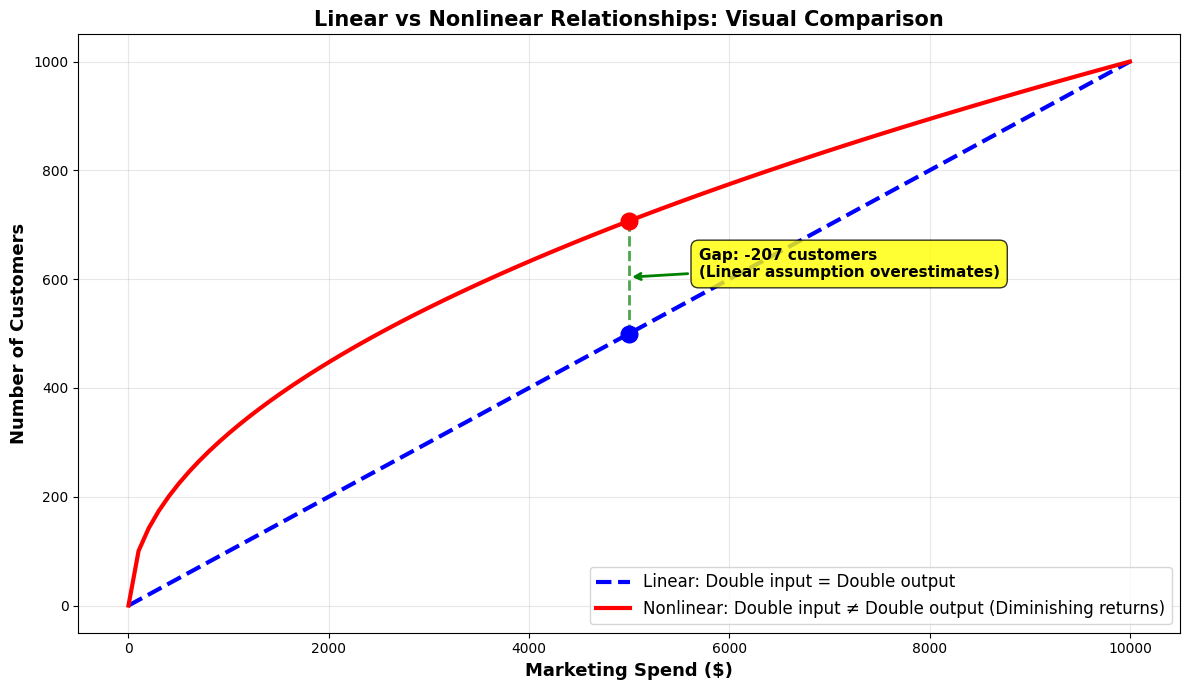


Key Observations:
  - Blue dashed line: Linear relationship (straight)
  - Red solid line: Nonlinear relationship (curved)
  - The gap between them grows as spending increases
  - Assuming linearity leads to overestimating results
  - This causes poor decisions and wasted resources


In [6]:
fig, ax = plt.subplots(figsize=(12, 7))

# Plot both relationships
ax.plot(marketing_levels, linear_customers, 'b-', linewidth=3, 
        label='Linear: Double input = Double output', linestyle='--')
ax.plot(marketing_levels, nonlinear_customers, 'r-', linewidth=3, 
        label='Nonlinear: Double input ≠ Double output (Diminishing returns)')

ax.set_xlabel('Marketing Spend ($)', fontsize=13, fontweight='bold')
ax.set_ylabel('Number of Customers', fontsize=13, fontweight='bold')
ax.set_title('Linear vs Nonlinear Relationships: Visual Comparison', 
            fontsize=15, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(fontsize=12, loc='lower right')

# Highlight the gap at a specific point
highlight_spend = 5000
linear_val = linear_relationship(highlight_spend)
nonlinear_val = nonlinear_relationship(highlight_spend)
gap = linear_val - nonlinear_val

ax.plot(highlight_spend, linear_val, 'bo', markersize=12, zorder=3)
ax.plot(highlight_spend, nonlinear_val, 'ro', markersize=12, zorder=3)
ax.plot([highlight_spend, highlight_spend], [nonlinear_val, linear_val], 
        'g--', linewidth=2, alpha=0.7)
ax.annotate(f'Gap: {gap:.0f} customers\n(Linear assumption overestimates)', 
            (highlight_spend, (linear_val + nonlinear_val) / 2),
            xytext=(50, 0), textcoords='offset points',
            fontsize=11, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.8),
            arrowprops=dict(arrowstyle='->', color='green', lw=2))

plt.tight_layout()
plt.show()

print("\nKey Observations:")
print("  - Blue dashed line: Linear relationship (straight)")
print("  - Red solid line: Nonlinear relationship (curved)")
print("  - The gap between them grows as spending increases")
print("  - Assuming linearity leads to overestimating results")
print("  - This causes poor decisions and wasted resources")


## Summary: Understanding Linear vs Nonlinear

**Linear Relationships**:
- Straight line when graphed
- Proportional: double input = double output
- Simple to understand and predict
- **Rare in business** - most relationships are not linear

**Nonlinear Relationships**:
- Curved line when graphed
- Non-proportional: double input ≠ double output
- More complex but more realistic
- **Common in business** - most relationships are nonlinear

**Why This Matters**:
- Assuming linearity when relationships are nonlinear leads to:
  - Unrealistic expectations
  - Poor resource allocation decisions
  - Wasted money on ineffective investments
  - Misinterpretation of model recommendations

**Critical Insight**: Most business relationships show diminishing returns (nonlinear). Always question whether a relationship is linear or nonlinear before making decisions based on proportional assumptions.
